In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('BP_data.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,21.090000,21.129999,20.549999,20.830000,17.184427,14485100
1,2021-01-05,21.430000,22.780001,21.370001,22.379999,18.463150,25447500
2,2021-01-06,23.370001,23.860001,22.940001,23.410000,19.312887,25221400
3,2021-01-07,23.719999,24.150000,23.500000,23.910000,19.725380,16470700
4,2021-01-08,24.170000,24.490000,23.990000,24.400000,20.129620,20189600
5,2021-01-11,23.760000,24.500000,23.680000,24.379999,20.113119,12509400
6,2021-01-12,24.940001,25.190001,24.719999,25.010000,20.632862,16990200
7,2021-01-13,25.110001,25.120001,24.620001,24.780001,20.443115,14152800
8,2021-01-14,25.020000,25.549999,24.969999,25.469999,21.012354,14279000
9,2021-01-15,24.799999,24.889999,24.139999,24.260000,20.014122,24063900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       977 non-null    object 
 1   Open       977 non-null    float64
 2   High       977 non-null    float64
 3   Low        977 non-null    float64
 4   Close      977 non-null    float64
 5   Adj Close  977 non-null    float64
 6   Volume     977 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 53.6+ KB


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2021-01-04
1     2021-01-05
2     2021-01-06
3     2021-01-07
4     2021-01-08
         ...    
972   2024-11-13
973   2024-11-14
974   2024-11-15
975   2024-11-18
976   2024-11-19
Name: Date, Length: 977, dtype: datetime64[ns]

In [28]:
df.set_index('Date', inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 948 entries, 2021-02-16 to 2024-11-19
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       948 non-null    float64
 1   High       948 non-null    float64
 2   Low        948 non-null    float64
 3   Close      948 non-null    float64
 4   Adj Close  948 non-null    float64
 5   Volume     948 non-null    int64  
 6   MA7        948 non-null    float64
 7   MA30       948 non-null    float64
 8   Lag1       948 non-null    float64
 9   Lag2       948 non-null    float64
 10  Lag3       948 non-null    float64
 11  Lag4       948 non-null    float64
 12  Lag7       948 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 103.7 KB


In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA7,MA30,Lag1,Lag2,Lag3,Lag4,Lag7
count,948.000000,948.000000,948.000000,948.000000,948.000000,9.480000e+02,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,32.400707,32.668228,32.099177,32.382774,29.540430,1.047937e+07,29.505032,29.373563,29.528811,29.516374,29.504584,29.458050,29.458050
std,4.605452,4.599991,4.601112,4.603129,5.241095,4.676728e+06,5.253509,5.307612,5.254286,5.268479,5.282168,5.337640,5.337640
min,22.559999,22.980000,22.440001,22.459999,18.780029,3.506800e+06,17.985839,18.917443,18.075411,17.629915,17.629915,17.167927,17.167927
25%,28.370001,28.692501,27.965000,28.377500,24.930552,7.286575e+06,25.048408,24.678660,24.911469,24.891549,24.867198,24.757502,24.757502
50%,32.859999,33.174999,32.550001,32.865000,30.799075,9.338950e+06,31.020057,30.912057,30.799075,30.799075,30.799075,30.799075,30.799075
75%,35.964999,36.187500,35.652501,35.902501,33.909512,1.257772e+07,33.928562,34.079496,33.909512,33.909512,33.909512,33.909512,33.909512
max,40.689999,41.380001,40.470001,41.020000,38.170727,3.996530e+07,37.651343,37.150046,38.170727,38.170727,38.170727,38.170727,38.170727


In [38]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,MA7,MA30,Lag1,Lag2,Lag3,Lag4,Lag7
Date,,,,,,,,,,,,,
2021-03-29,24.930000,25.280001,24.820000,25.180000,21.054369,11019200,20.853692,21.023580,21.096180,20.544313,20.694820,21.246681,21.246681
2021-03-30,24.840000,25.020000,24.700001,24.879999,20.803524,7130200,20.786800,21.079593,21.054369,21.096180,20.544313,21.271767,21.271767
2021-03-31,24.610001,24.680000,24.309999,24.350000,20.360361,10283200,20.667349,21.109833,20.803524,21.054369,21.096180,21.196514,21.196514
2021-04-01,24.469999,24.610001,24.100000,24.580000,20.552675,14540500,20.729463,21.168922,20.360361,20.803524,21.054369,20.117878,20.117878
2021-04-05,24.580000,24.709999,24.100000,24.260000,20.285109,19634400,20.670933,21.207663,20.552675,20.360361,20.803524,20.694820,20.694820
2021-04-06,24.889999,25.530001,24.809999,25.100000,20.987478,24553400,20.734242,21.248635,20.285109,20.552675,20.360361,20.544313,20.544313
2021-04-07,25.200001,25.570000,25.150000,25.370001,21.213238,15516900,20.750965,21.280409,20.987478,20.285109,20.552675,21.096180,21.096180
2021-04-08,24.940001,24.940001,24.480000,24.719999,20.669741,19213800,20.696018,21.264243,21.213238,20.987478,20.285109,21.054369,21.054369
2021-04-09,24.580000,24.770000,24.320000,24.389999,20.393805,14609800,20.637487,21.230797,20.669741,21.213238,20.987478,20.803524,20.803524


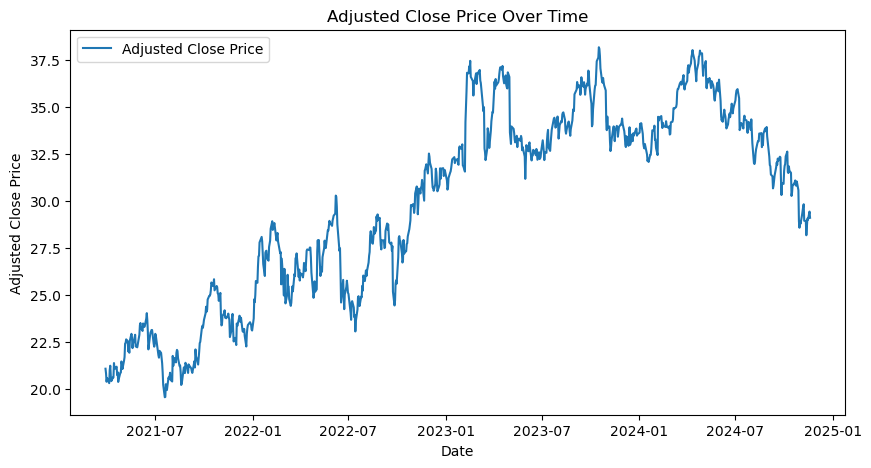

In [39]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df , x = 'Date' , y = 'Adj Close' , label = 'Adjusted Close Price')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.title("Correlation matrix")
plt.show()

In [32]:
df['MA7'] = df['Adj Close'].rolling(window = 7).mean()
df['MA30'] = df['Adj Close'].rolling(window = 30).mean()

In [33]:
df['Lag1'] = df['Adj Close'].shift(1);
df['Lag2'] = df['Adj Close'].shift(2);
df['Lag3'] = df['Adj Close'].shift(3);
df['Lag7'] = df['Adj Close'].shift(7);

In [34]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,MA7,MA30,Lag1,Lag2,Lag3,Lag4,Lag7
Date,,,,,,,,,,,,,
2021-02-16,23.090000,23.299999,22.889999,23.180000,19.123142,18144000,NaN,NaN,NaN,NaN,NaN,17.316423,NaN
2021-02-17,23.290001,23.590000,22.910000,23.580000,19.453135,17490100,NaN,NaN,19.123142,NaN,NaN,17.167927,NaN
2021-02-18,22.860001,23.010000,22.440001,22.459999,18.780029,13338600,NaN,NaN,19.453135,19.123142,NaN,18.174408,NaN
2021-02-19,22.559999,22.980000,22.530001,22.870001,19.122854,12257700,NaN,NaN,18.780029,19.453135,19.123142,17.926910,NaN
2021-02-22,22.900000,23.910000,22.860001,23.629999,19.758327,16249700,NaN,NaN,19.122854,18.780029,19.453135,17.803162,NaN
2021-02-23,24.080000,24.320000,23.330000,24.230000,20.260025,21295500,NaN,NaN,19.758327,19.122854,18.780029,17.629915,NaN
2021-02-24,24.639999,25.440001,24.520000,25.299999,21.154705,21440900,19.664603,NaN,20.260025,19.758327,19.122854,18.075411,NaN
2021-02-25,25.920000,26.129999,25.270000,25.590000,21.397194,28613600,19.989467,NaN,21.154705,20.260025,19.758327,19.123142,19.123142
2021-02-26,24.760000,24.850000,24.180000,24.410000,20.410530,22962500,20.126238,NaN,21.397194,21.154705,20.260025,19.453135,19.453135


In [35]:
df.dropna(inplace = True)

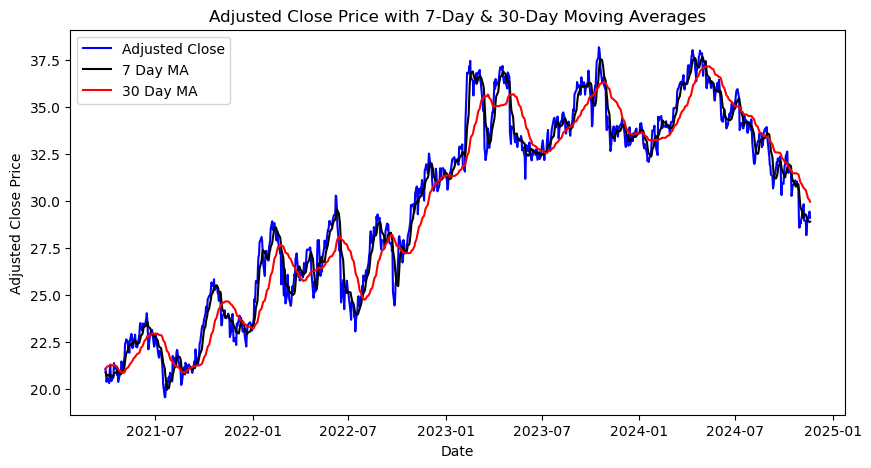

In [36]:
plt.figure(figsize = (10,5))
plt.plot(df['Adj Close'] ,label = 'Adjusted Close' , color = 'blue')
plt.plot(df['MA7'] , label = '7 Day MA' , color = 'black')
plt.plot(df['MA30'],label = '30 Day MA' , color = 'red')
plt.title('Adjusted Close Price with 7-Day & 30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

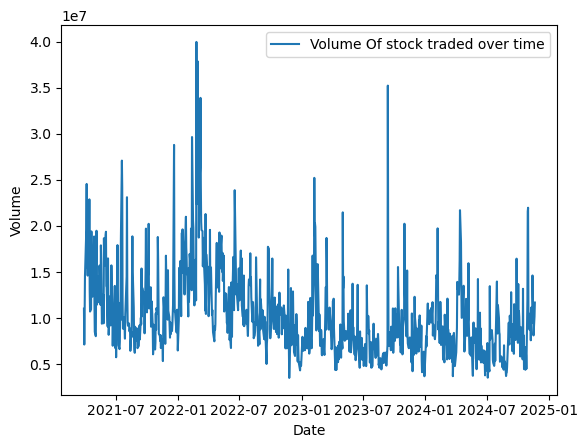

In [49]:
plt.plot(figsize = (100,100))
sns.lineplot(x = 'Date' , y = 'Volume' , data = df , label = 'Volume Of stock traded overtime')
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 919 entries, 2021-03-29 to 2024-11-19
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       919 non-null    float64
 1   High       919 non-null    float64
 2   Low        919 non-null    float64
 3   Close      919 non-null    float64
 4   Adj Close  919 non-null    float64
 5   Volume     919 non-null    int64  
 6   MA7        919 non-null    float64
 7   MA30       919 non-null    float64
 8   Lag1       919 non-null    float64
 9   Lag2       919 non-null    float64
 10  Lag3       919 non-null    float64
 11  Lag4       919 non-null    float64
 12  Lag7       919 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 100.5 KB


In [51]:
x = df[['Open' , 'High' , 'Low' , 'Close' , 'Volume', 'MA7' , 'MA30','Lag1','Lag2' , 'Lag3' , 'Lag4' , 'Lag7']]
y = df['Adj Close']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2 , shuffle = False)

In [55]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [58]:
print(f'MAE : {mean_absolute_error(lr_pred , y_test):.4f}')
print(f'MSE : {mean_squared_error(lr_pred , y_test):.4f}')
print(f'R2 Score: {r2_score(y_test, lr_pred):.4f}')


MAE : 0.7566
MSE : 0.6658
R2 Score: 0.8937


In [59]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [60]:
print(f'MAE : {mean_absolute_error(dt_pred , y_test):.4f}')
print(f'MSE : {mean_squared_error(dt_pred , y_test):.4f}')
print(f'R2 Score: {r2_score(y_test, dt_pred):.4f}')

MAE : 1.3044
MSE : 2.4287
R2 Score: 0.6122


In [61]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [62]:
print(f'MAE : {mean_absolute_error(rf_pred , y_test):.4f}')
print(f'MSE : {mean_squared_error(rf_pred , y_test):.4f}')
print(f'R2 Score: {r2_score(y_test, rf_pred):.4f}')

MAE : 1.1833
MSE : 1.8027
R2 Score: 0.7122


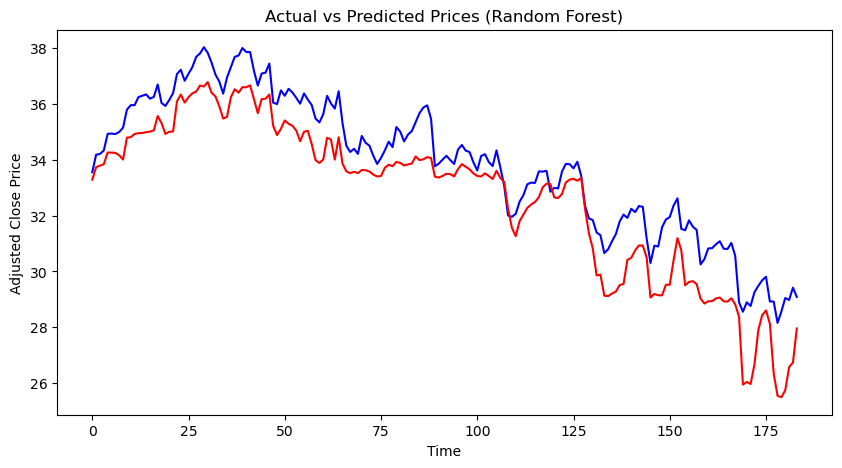

In [65]:
plt.figure(figsize = (10,5))
plt.plot(y_test.values , label = 'Actual Price' , color = 'blue')
plt.plot(rf_pred , label = 'Predicted Price' , color = 'red')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.show()

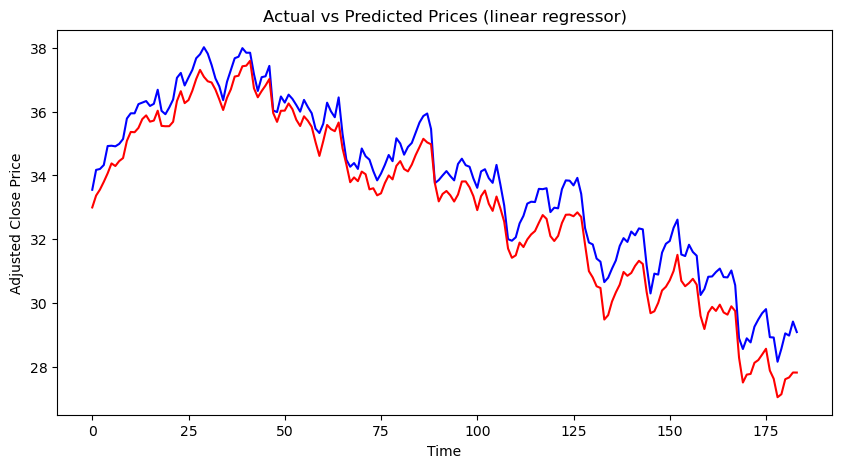

In [66]:
plt.figure(figsize = (10,5))
plt.plot(y_test.values , label = 'Actual Price' , color = 'blue')
plt.plot(lr_pred , label = 'Predicted Price' , color = 'red')
plt.title('Actual vs Predicted Prices (linear regressor)')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.show()

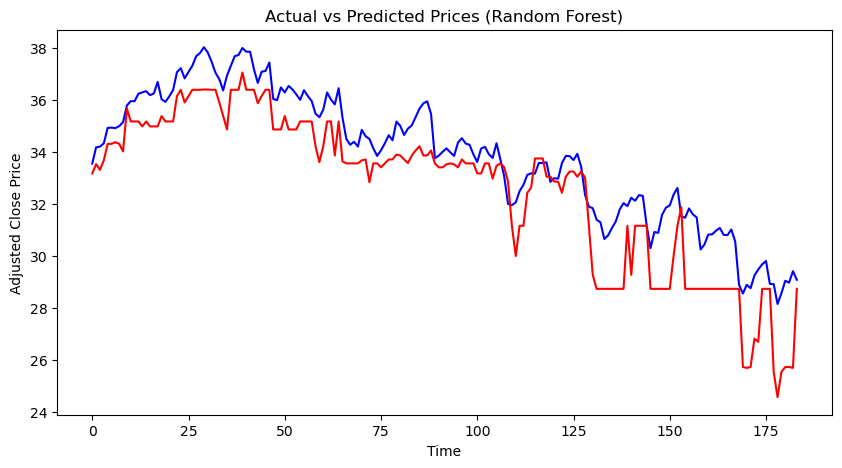

In [67]:
plt.figure(figsize = (10,5))
plt.plot(y_test.values , label = 'Actual Price' , color = 'blue')
plt.plot(dt_pred , label = 'Predicted Price' , color = 'red')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.show()

In [71]:
future_data = x_scaled[-1].reshape(1,-1)
future_pred = rf.predict(future_data)
print(f'Predicted future Adjusted Close Price: {future_pred[0]:.2f}')

Predicted future Adjusted Close Price: 27.96


In [72]:
future_data = x_scaled[-1].reshape(1,-1)
future_pred = dt.predict(future_data)
print(f'Predicted future Adjusted Close Price: {future_pred[0]:.2f}')

Predicted future Adjusted Close Price: 28.74


In [73]:
future_data = x_scaled[-1].reshape(1,-1)
future_pred = lr.predict(future_data)
print(f'Predicted future Adjusted Close Price: {future_pred[0]:.2f}')

Predicted future Adjusted Close Price: 27.82
